<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [122]:
df_original = df.copy()
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


### By hand - 1

In [0]:
df = df.drop(columns=['Unnamed: 32']) # This appears to be a useless array of nans

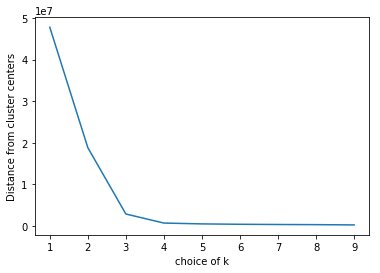

In [124]:
# Using a k-means library first to choose the best number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
  kmean_model = KMeans(n_clusters=k).fit(df)
  kmean_model.fit(df)
  distortions.append(sum(np.min(cdist(df,kmean_model.cluster_centers_,'euclidean'),axis=1))/df.shape[0])
  
plt.plot(K,distortions)
plt.xlabel('choice of k')
plt.ylabel('Distance from cluster centers');

From the above elbow plot, 3 clusters centers is ideal, but then later I looked at the dataset and realized there's only two things being predicted inthe diagnosis, M, and B (malignant and benign) so we only need two clusters

In [125]:
n_clusters = 2
centroids = df.sample(n_clusters)



def get_centroids(df, column_header):
  headers = []
  values = []
  for col in list(df.columns):
    header = col
    headers.append(header)
    value = [df[col][df[column_header] == i].mean() for i in range(n_clusters)]
    values.append(value)
    data = dict(zip(headers,values))
  return pd.DataFrame(data)




def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice(list(range(n_clusters)))] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i > 0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))
    
    col_names = list(df.columns)
    distances = cdist(df_temp[col_names], centroids[col_names])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
      
      
  
  
hand_kmeans = find_nearest_centroid(df, centroids)
hand_kmeans.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster0,cluster1,cluster2
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,1
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1,1,1
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1,1,1
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,1,1
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1,1,1
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,1,1


### By hand - 2
Ignore for now

In [0]:
#### IGNORE THIS - SIDE WORK ########

# df_sample = df.iloc[:,1:3]
# df_sample.plot.scatter('radius_mean','texture_mean')
# centroids= df_sample.sample(2)

# print(centroids)
# print(df_sample.head())

# def find_centroids(df, new_groups):
#   centroids = []
#  # for col in df:

    
# def check_for_convergence(df):
#    if (df.iloc[:,-1].equals(df.iloc[:,-2])) or (df.iloc[:,-1].equals(df.iloc[:,-3])):
#       return True
#    else:
#     return False
    
    
# def add_cluster_iteration(df_sample,i):
#   global centroids
#   distances = cdist(df_sample,centroids,'euclidean')
#   new_groups = pd.Series(np.argmin(distances,axis=1))
#   df_sample['cluster_'+str(i)] = new_groups
#   centroids = find_centroids(df_sample,new_groups)
#   return df_sample

  
# # new_df_sample = add_cluster_iteration(df_sample,1)
# # new_df_sample

# def run_kmeans(df):
#   converged = check_for_convergence(df)
#   i = 1
#   while not converged:
#     df = add_cluster_iteration(df,i)
#     i += 1
#     converged = check_for_convergence(df)
#   return df

# run_kmeans(df_sample)

### With libraries

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

library_labels = kmeans.labels_

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true dianosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
def convert_labels(letter):
  if letter == 'M':
    return 0
  else:
    return 1

actual_labels = df_original.diagnosis.apply(convert_labels)

In [0]:
hand_labels = hand_kmeans.iloc[:,-1]
hand_labels = (hand_labels + 1) % 1   # it is opposite, so must switch label data

hand_labels = np.array(hand_labels)
actual_labels = np.array(actual_labels)  #convert pd series to nparray


In [159]:
print('actual labels :',actual_labels[0:25])
print('hand labels:   ',hand_labels[0:25])
print('library labels:',library_labels[0:25])

actual labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
hand labels:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
library labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [161]:
compare = pd.DataFrame({'actual':actual_labels,'hand':hand_labels,'library':library_labels})
print('Actual vs hand:\n',compare.actual.eq(compare.hand).sum()/compare.shape[0])
print('\nlibrary vs hand:\n',compare.actual.eq(compare.library).sum()/compare.shape[0])

Actual vs hand:
 0.37258347978910367

library vs hand:
 0.37434094903339193


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
from sklearn.decomposition import PCA
pca = PCA(10)
pca.fit(df)

data = pca.transform(df)

In [0]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)

pca_lib_labels = kmeans.labels_

In [173]:
actual_pca_compare = pd.DataFrame({'actual':actual_labels,'pca':pca_lib_labels})
actual_pca_compare.actual.eq(actual_pca_compare.pca).sum()/actual_pca_compare.shape[0]

0.37434094903339193

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores when preprocessing the data with PCA compare to the accuracy when clustering on the raw data?

In [167]:
actual_pca_compare = pd.DataFrame({'actual':actual_labels,'pca':pca_lib_labels})
actual_pca_compare.actual.eq(actual_pca_compare.pca).sum()/actual_pca_compare.shape[0]

0.37434094903339193

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project
- Practice your two-minute presentation for your Data Storytelling Project